# Calendar Spread Payoff

current month 의 option 을 팔고 그에 대한 protection 으로 1 개월 후 option 을 매수하는 것.

만기가 다가온 option 의 time decay 가 훨씬 빠르므로, 주가가 움직이지 않고 제자리에 있다면 time decay 의 속도 차이에서 이익을 낼 수 있다.

In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('./'))))

from payoff import *

## Setup

Calendar Spread 는 동일 기초자산, 동일 행사가의 서로 다른 만기 옵션으로 구성된다.

* 근월물 call (put) 매도 - "front-month"

* 원월물 call (put) 매수 - "back-month"


    * 2018 11 월 28 만기 KOSPI200 10400 행사가 call 을 50.50 에 매도 - "front-month"
    * 2018 12 월 30 만기 KOSPI200 10400 행사가 call 을 148.50 에 매수 - "back-month"

In [2]:
# 선물 시세
kospi_nov_fut = 10350.00
kospi_dec_fut = 10387.00

strike_price = 10400
nov_call_price = 50.50
dec_call_price = 148.50
setup_cost = dec_call_price - nov_call_price

# 거래 진입일을 2018 년 11 월 21 일이라 가정하면 잔존일수는 다음과 같다.
days_to_expiry_nov_call = 7
days_to_expiry_dec_call = 34

#kospi200 의 변동성 범위
sT = np.arange(0.92*kospi_nov_fut, 1.1*kospi_dec_fut, 1)

# 이자율
interest_rate = 0.0

# Implied volatility 계산

블랙숄즈 모델을 이용하여 front-month 와 back-month call option 의 내재 변동성 계산. 이 내재변동성은 kospi200 의 서로 다른 value 에 대한 call price  계산에 이용할 것임.

In [3]:
# Front-month IV
nov_call_iv = mibian.BS([kospi_nov_fut, strike_price, interest_rate, days_to_expiry_nov_call],
                       callPrice=nov_call_price).impliedVolatility
print("Front-month IV : {:.2f} %".format(nov_call_iv))

# Back-month IV
dec_call_iv = mibian.BS([kospi_dec_fut, strike_price, interest_rate, days_to_expiry_dec_call],
                       callPrice=dec_call_price).impliedVolatility
print("Back-month IV : {:.2f} %".format(dec_call_iv))

Front-month IV : 12.70 %
Back-month IV : 12.25 %


## front 와 back month option 에 대한 call price 계산



In [4]:
days_to_expiry_nov_call = 0.001
days_to_expiry_dec_call = 29 - days_to_expiry_nov_call

df = pd.DataFrame()
df['kospi200_price'] = sT
df['nov_call_price'] = np.nan
df['dec_call_price'] = np.nan

# kospi200 의 가능한 다른 value 에 대한 call price 계산
for i in range(0, len(df)):
    df.loc[i, 'nov_call_price'] = mibian.BS([df.iloc[i]['kospi200_price'], strike_price, interest_rate, days_to_expiry_nov_call],
                                                           volatility=nov_call_iv).callPrice
    # inerest rate 가 0 이므로 12월 선물 가격을 구하기 위해 35 를 더해줌
    df.loc[i, 'dec_call_price'] = mibian.BS([df.iloc[i]['kospi200_price']+35, strike_price, interest_rate, days_to_expiry_dec_call],
                                                           volatility=dec_call_iv).callPrice

In [8]:
df

,kospi200_price,nov_call_price,dec_call_price,payoff
0,9522.0,0.0,0.806387,-97.193613
1,9523.0,0.0,0.813929,-97.186071
2,9524.0,0.0,0.821534,-97.178466
3,9525.0,0.0,0.829203,-97.170797
4,9526.0,0.0,0.836937,-97.163063
5,9527.0,0.0,0.844735,-97.155265
6,9528.0,0.0,0.852599,-97.147401
7,9529.0,0.0,0.860528,-97.139472
8,9530.0,0.0,0.868523,-97.131477
9,9531.0,0.0,0.876584,-97.123416


## Payoff

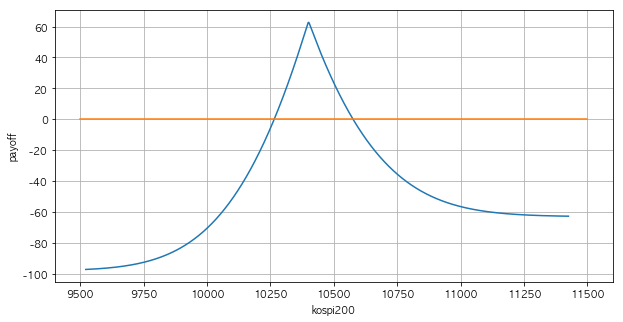

In [6]:
df['payoff'] = df.dec_call_price - df.nov_call_price - setup_cost
plt.figure(figsize=(10, 5))
plt.ylabel('payoff')
plt.xlabel('kospi200')
plt.plot(sT, df.payoff)
plt.plot([9500, 11500],[0,0])
plt.grid()

The key takeaways from the graphs are - 

1. front-month 만기일의 kospi200 선물 가격이 옵션 행사가격 일때 최대 이익이 실현된다. 
2. 옵션의 행사가격에서 양방향으로 멀어질 수록 이익이 감소한다. 
3. 옵션이 deep ITM 이나 deep OTM 으로 움직이면 최대 손실이 발생한다. 